# 📊 Data Cleaning - Telco Customer Churn Dataset

Dataset ini berasal dari Kaggle dan berisi data pelanggan layanan telekomunikasi. Tujuan dari proses cleaning ini adalah untuk memastikan data bersih, konsisten, dan siap dianalisis atau digunakan dalam model prediksi churn.

Sumber dataset: [Kaggle - Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

# 1 Import library yang dibutuhkan dan file raw telco customer churn

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
data_raw_path = os.path.join(project_root, 'data', 'raw')

# 2 Pastikan kalau datasetnya sudah berhasil disimpan

In [38]:
print(os.listdir(data_raw_path))

['telco_raw.csv']


# 3 Load Dataset
Membaca file csv ke dalam pandas DataFrame dan juga memeriksa informasi dari Dataset.

In [39]:
df = pd.read_csv('../data/raw/telco_raw.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 5 Cek Missing Value & Duplikat

Langkah ini penting untuk mengetahui apakah ada data yang perlu dibersihkan sebelum proses analisis lebih lanjut.

In [41]:
df.isnull().sum()
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# 6 Distribusi Data

# Cek kolom Kategorikal & Numerik

Kita kelompokkan fitur menjadi dua kategori:
- Numerik: dapat dihitung secara matematis.
- Kategorikal: berisi label atau kategori tertentu.

In [42]:
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Kolom Kategorikal:", list(cat_cols))
print("Kolom Numerik:", list(num_cols))

Kolom Kategorikal: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Kolom Numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


# 7 Unik Value per Kolom 

Mengecek nilai unik untuk setiap kolom kategorikal untuk membantu pemahaman.

In [43]:
for col in df.columns:
    if df[col].dtype == 'object' and col != 'customerID':
        print(col)
        print("-"*50)
        print("nilai unik:", df[col].unique())
        print("-"*50)
        print("jumlah nilai unik:", df[col].value_counts())
        print("\n")

gender
--------------------------------------------------
nilai unik: ['Female' 'Male']
--------------------------------------------------
jumlah nilai unik: gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner
--------------------------------------------------
nilai unik: ['Yes' 'No']
--------------------------------------------------
jumlah nilai unik: Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
--------------------------------------------------
nilai unik: ['No' 'Yes']
--------------------------------------------------
jumlah nilai unik: Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService
--------------------------------------------------
nilai unik: ['No' 'Yes']
--------------------------------------------------
jumlah nilai unik: PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
--------------------------------------------------
nilai unik: ['No phone service' 'No' 'Yes']
----------

# Distribusi Target (Churn)

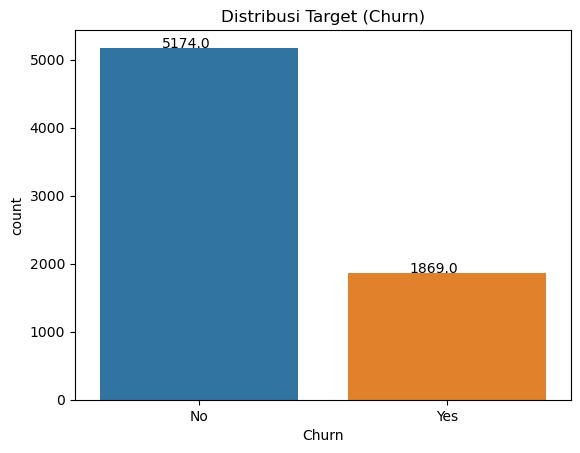

In [45]:
ax = sns.countplot(x='Churn', data=df, hue = 'Churn')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.25, p.get_height() + 0.01))

ax.set_title('Distribusi Target (Churn)')

plt.show()